# A second example of PCA: handwritten digits

In this notebook we go through a second example of PCA: applying it to a subset of the MNIST digits we discussed in Lec. 3.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap

## Loading up MNIST from `keras`

We will focus only on the training set, and only on the digit 1.

In [2]:
from keras.datasets.mnist import load_data

((x_train, y_train), (_, _)) = load_data()
print(type(x_train))
print(x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'>
(60000, 28, 28)


The underscore `_` is a placeholder that allows us to unpack the tuple without assigning any variables that we don't plan to use.

Let's print the first digits in the whole dataset

Text(0.5, 1.0, '4')

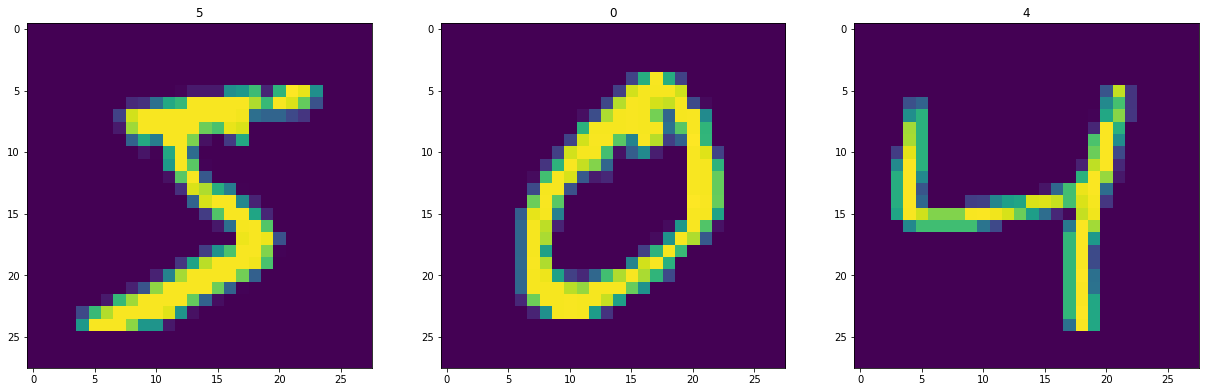

In [3]:
_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7 * 3, 7))


ax1.imshow(x_train[0, :, :])
ax1.set_title(y_train[0])  

ax2.imshow(x_train[1, :, :])
ax2.set_title(y_train[1])  

ax3.imshow(x_train[2, :, :])
ax3.set_title(y_train[2])  


**Let's focus our analysis on the digit 1**. We can define a new array `x` with only the digit 1.

In [4]:
x = x_train[np.where(y_train == 1)]

In [5]:
print(x.shape)

(6742, 28, 28)


Let's print random samples of this new dataset with only the digit 1:

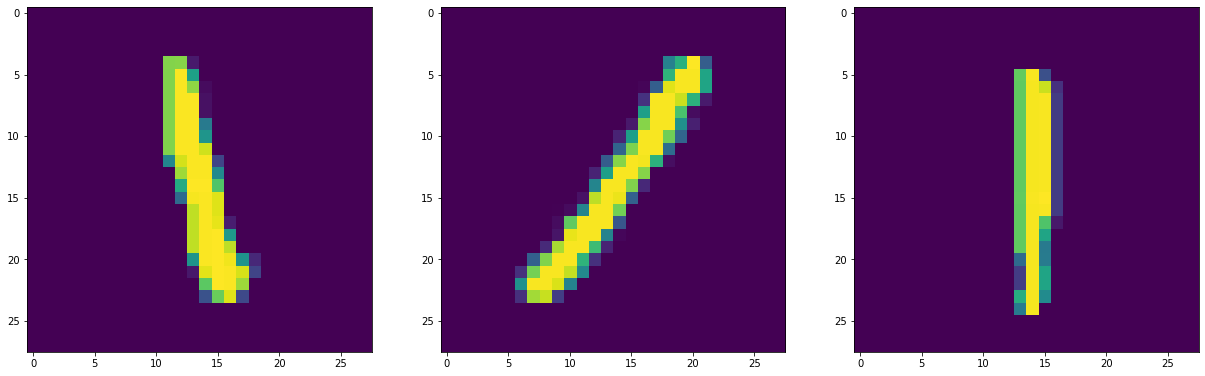

In [11]:
_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7 * 3, 7))

ax1.imshow(x[np.random.randint(len(x)), :, :])
ax2.imshow(x[np.random.randint(len(x)), :, :])
ax3.imshow(x[np.random.randint(len(x)), :, :])

After running it several times, you might notice that some people write one slanted towards the right, and others write it slanted towards the left. These are an example of a possible *latent variable*: how tilted the digit is.

## Preprocessing for the PCA

We need to reshape the data and pass it through a standard scaler.

In [12]:
original_x = x.copy()
x.shape

(6742, 28, 28)

In [13]:
x = x.astype(float) / 255.0

In [14]:
from sklearn.preprocessing import StandardScaler

x = x.reshape(x.shape[0], 28*28)
# x = x.astype(float) / 255.0

scaler = StandardScaler()
x = scaler.fit_transform(x)

## Fitting a PCA and understanding the components

Now let's fit a PCA with all `28*28` components and visualize them a bit.

In [15]:
full_pca = PCA()
full_pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

As is customary, we can analyse the variance explained by each one of the principal components.

Text(0.5, 0, '# of Principal Components')

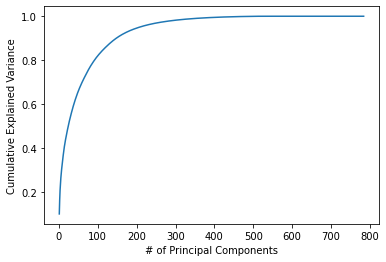

In [17]:
sns.lineplot(x=np.arange(1, 28*28 + 1), y=np.cumsum(full_pca.explained_variance_ratio_))
plt.ylabel("Cumulative Explained Variance")
plt.xlabel("# of Principal Components")

### A small detour: visualizing the components

Since in this example we are dealing with images, the actual principal components may also have a visual interpretation. Let's print the first three:

In [18]:
components = full_pca.components_
components.shape

(784, 784)

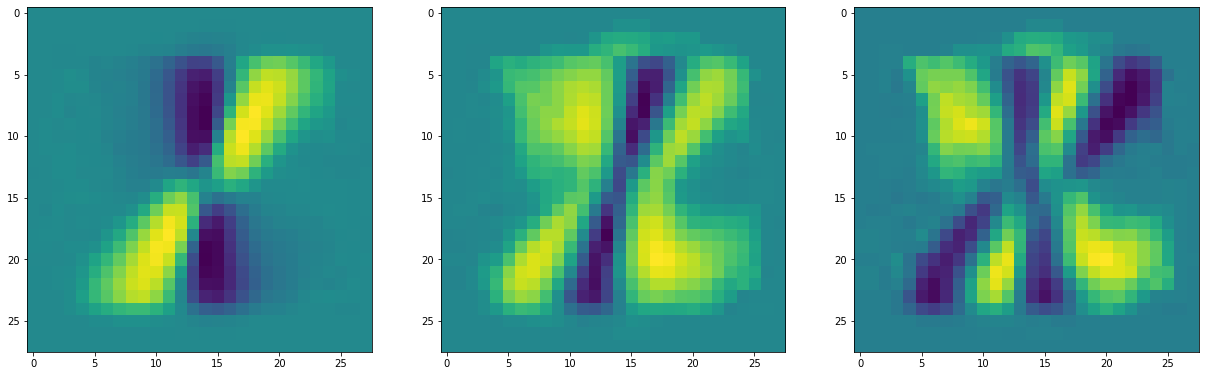

In [19]:
_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7 * 3, 7))

ax1.imshow(components[0, :].reshape(28, 28))
ax2.imshow(components[1, :].reshape(28, 28))
ax3.imshow(components[2, :].reshape(28, 28))

These can actually be used for **data compression** and for **noise reduction**. Those two topics are outside the scope of the lecture, but if you want to learn more, I would recommend [this in-depth analysis](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html).

## Projecting to lower dimensions

Let's check how the projection to 2D looks like in PCA, t-SNE and Isomap:

In [20]:
pca = PCA(n_components=2)
z_pca = pca.fit_transform(x)

tsne = TSNE(n_components=2)
z_tsne = tsne.fit_transform(x)

isomap = Isomap(n_components=2)
z_isomap = isomap.fit_transform(x)

In [21]:
"""
Some black magic for better scatterplots.
Don't modify :).

Taken and adapted from:
https://stackoverflow.com/questions/59373626/matplotlib-scatter-different-images-mnist-instead-of-plots-for-tsne
"""

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def plot_images(z, images, ax):
  """
  A function that plots all images in {images}
  at coordinates {z}.
  """
  for zi, img in zip(z, images):
    im = OffsetImage(img, zoom=0.5)
    ab = AnnotationBbox(im, zi, xycoords='data', frameon=False)
    ax.add_artist(ab)
    ax.update_datalim([zi])
    ax.autoscale()

In [22]:
z_pca.shape

(6742, 2)

Text(0.5, 1.0, 'Using Isomap')

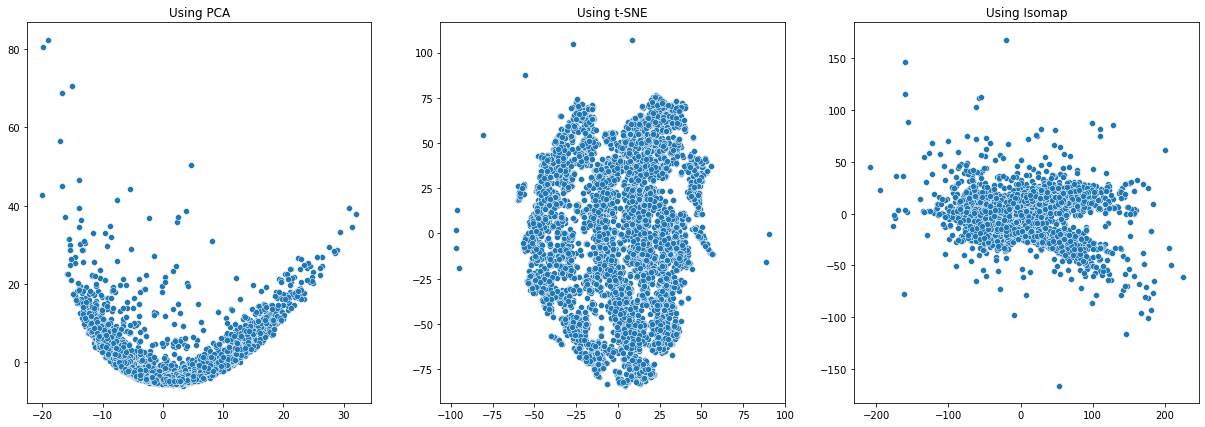

In [23]:
_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(3*7, 7))

sns.scatterplot(x=z_pca[:, 0], y=z_pca[:, 1], ax=ax1)
ax1.set_title("Using PCA")

sns.scatterplot(x=z_tsne[:, 0], y=z_tsne[:, 1], ax=ax2)
ax2.set_title("Using t-SNE")

sns.scatterplot(x=z_isomap[:, 0], y=z_isomap[:, 1], ax=ax3)
ax3.set_title("Using Isomap")

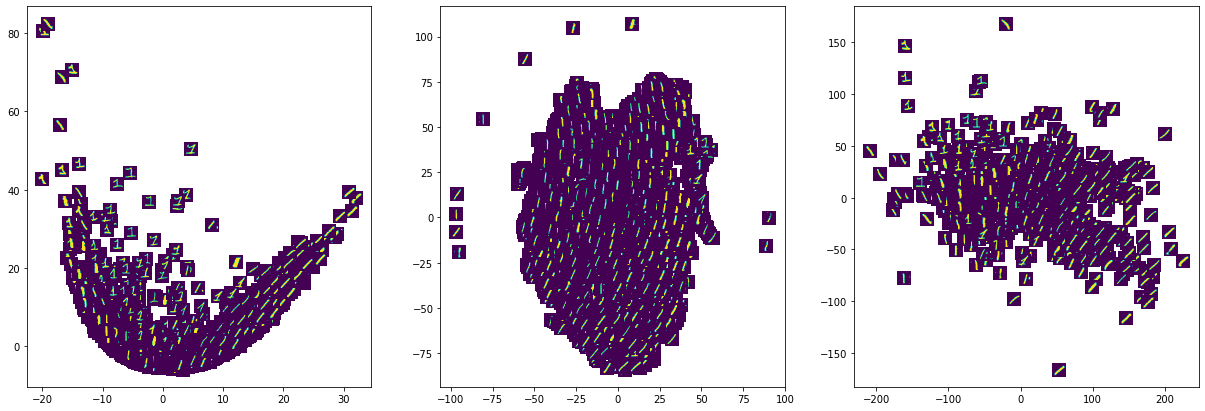

In [24]:
_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(3*7, 7))

plot_images(z_pca, original_x, ax=ax1)
plot_images(z_tsne, original_x, ax=ax2)
plot_images(z_isomap, original_x, ax=ax3)

Notice how, in PCA, the digits are distributed by how slanted they are. Interesting!